In [71]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from pylab import rcParams

save_figures_to_latex = False
figures_path = '../../latex1/figures'     # to change if notebook is used in future exercises
folder_path = 'results' # sufficient to be folder name since its in the same folder      

In [72]:
rcParams['figure.figsize'] = 6, 3
plt.rc('text', usetex=True)
plt.rcParams['text.usetex']=True
plt.rc('font', family='sans-serif', weight='bold')

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.dpi'] = 1000

In [73]:
import os
import pandas as pd

txt_files = [file for file in os.listdir() if file.endswith('.csv')]

dataframes = {}
regex_pattern = r'_n_(\d+)_m_(\d+)\.txt'
for txt_file in txt_files:
    dataframe_name = os.path.splitext(txt_file)[0]  # Use the file name without extension as DataFrame name
    dataframes[dataframe_name] = pd.read_csv(txt_file, delimiter='\,', header=0, index_col=False, engine='python')  # Use the first row as column names
    dataframes[dataframe_name].reset_index()
    dataframes[dataframe_name][['n', 'm']] = dataframes[dataframe_name]['filename'].str.extract(regex_pattern).astype(int)

Unique 'n' values: [120 140 160 180 200 250 300 320 322 329 330 345 347 361]
n_colors dictionary: {120: (1.0, 0.9607843137254902, 0.9411764705882353, 1.0), 140: (0.9976624375240293, 0.9116955017301038, 0.8710495963091118, 1.0), 160: (0.9943252595155709, 0.845997693194925, 0.7805767012687428, 1.0), 180: (0.9894040753556325, 0.754955786236063, 0.6600076893502499, 1.0), 200: (0.9882352941176471, 0.6614532871972318, 0.5489734717416378, 1.0), 250: (0.9879430988081508, 0.5608612072279893, 0.43537101114955795, 1.0), 300: (0.9854825067281815, 0.46243752402921956, 0.3369473279507882, 1.0), 320: (0.9702883506343714, 0.3607535563244906, 0.25513264129181085, 1.0), 322: (0.9407612456747405, 0.24510572856593618, 0.18131487889273357, 1.0), 329: (0.85919261822376, 0.15547866205305652, 0.1400230680507497, 1.0), 330: (0.7738715878508267, 0.0888581314878893, 0.10905036524413689, 1.0), 345: (0.6803690888119954, 0.06671280276816609, 0.08936562860438292, 1.0), 347: (0.5488504421376394, 0.035063437139561705,

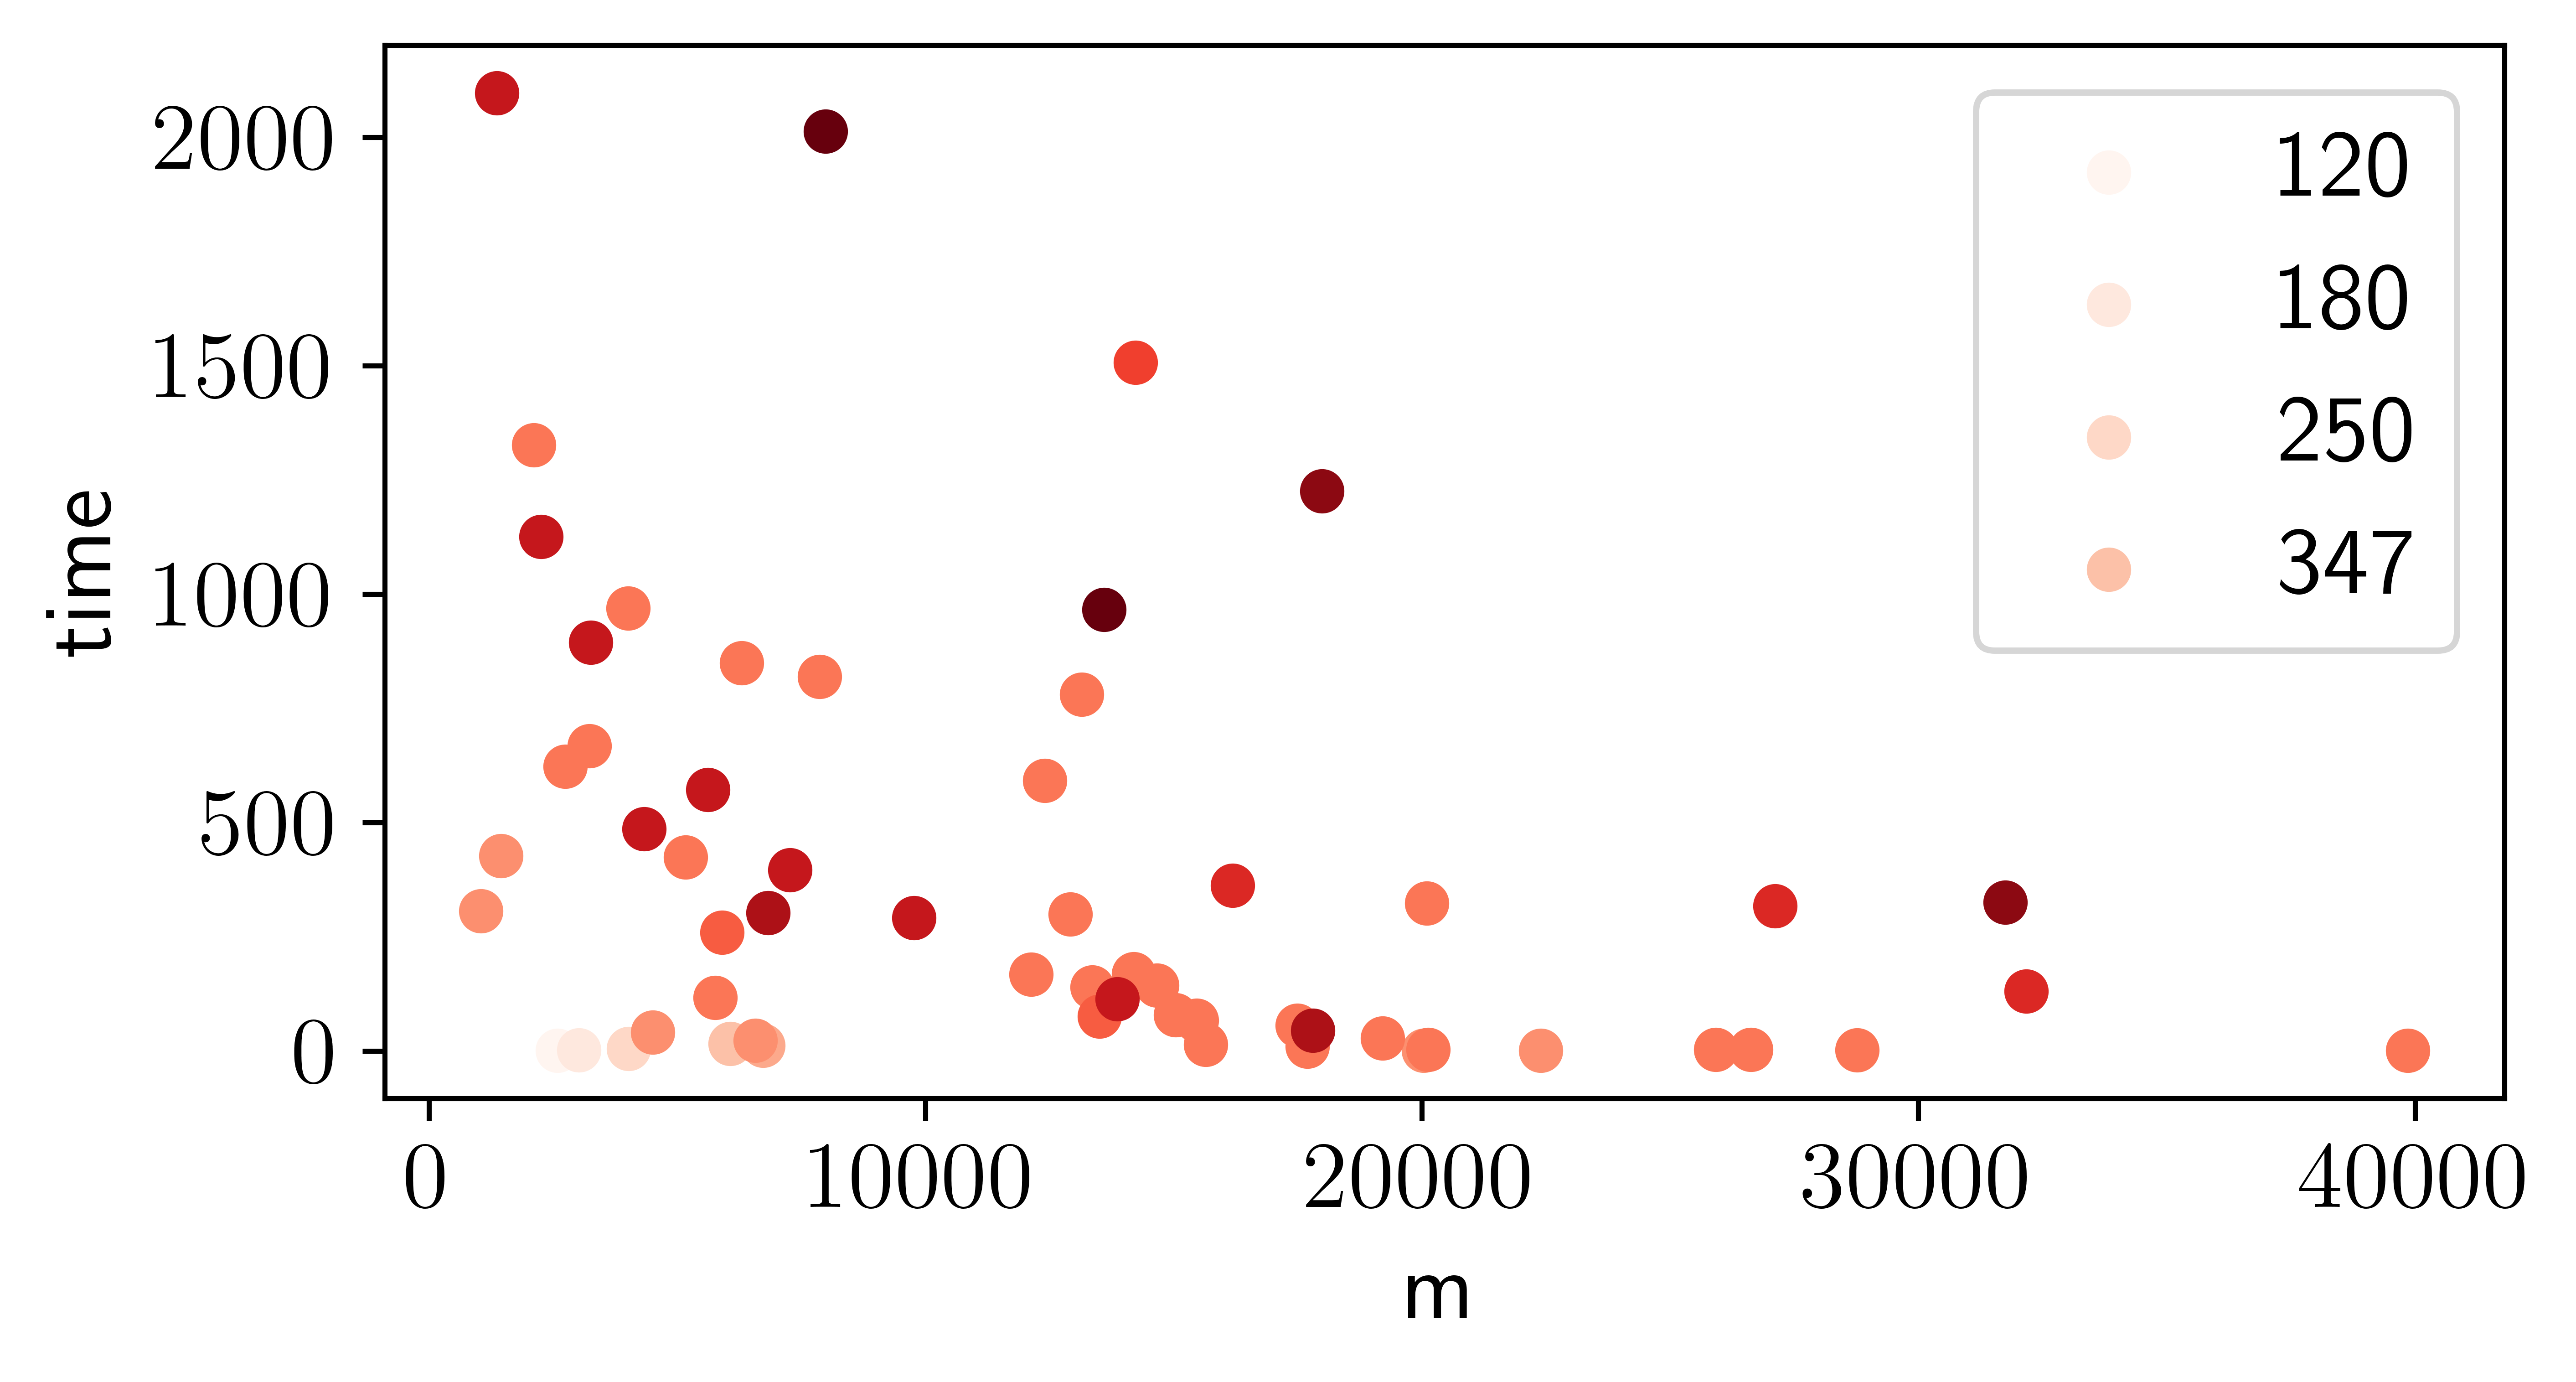

In [82]:
df = dataframes["full_run"]

# Assuming 'x_column' and 'y_column' are the columns you want to plot
x_column = 'm'
y_column = 'time'

unique_ns = df['n'].unique()
cmap = plt.cm.get_cmap('Reds')
n_colors = {unique_n: cmap(i / (len(unique_ns) - 1)) for i, unique_n in enumerate(unique_ns)}

print("Unique 'n' values:", unique_ns)
print("n_colors dictionary:", n_colors)

for n,n_df in df.groupby('n'):

        x = n_df[x_column]
        y = n_df[y_column]
        color = n_colors[n]

        plt.scatter(n_df[x_column], n_df[y_column], label=f'n = {n}', marker='o', color=color)
        
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend(["120", "180", "250", "347"])